# AIOE (AI Occupational Exposure) 데이터 전처리

이 노트북은 ChatGPT와 같은 언어 모델이 직업에 미치는 영향을 측정하기 위해 AIOE(AI Occupational Exposure) 점수를 계산합니다.

---

## 📚 AIOE란 무엇인가?

**AIOE(AI Occupational Exposure)** 는 특정 직업이 AI 기술에 의해 얼마나 영향을 받을 수 있는지를 정량화한 지표입니다.

### 🎯 핵심 아이디어

직업마다 요구되는 능력(Abilities)이 다릅니다. 예를 들어:
- **변호사**: 문서 이해력, 문장 작성력, 논리적 사고 등이 중요
- **요리사**: 미각, 손재주, 신체 조정 능력 등이 중요

그런데 AI(특히 ChatGPT 같은 언어 모델)는 **어떤 능력은 잘 수행**하지만, **어떤 능력은 전혀 못합니다**.
- ✅ AI가 잘하는 것: 문서 읽기, 글쓰기, 번역, 요약
- ❌ AI가 못하는 것: 요리하기, 신체 균형 잡기, 맛보기

**AIOE의 핵심 질문:**
> "이 직업이 필요로 하는 능력들 중에서, AI가 대체할 수 있는 능력의 비중이 얼마나 되는가?"

- **변호사**: 핵심 능력(문서 작성, 독해)을 AI가 잘함 → **높은 AIOE** (4.8점)
- **요리사**: 핵심 능력(요리, 맛보기)을 AI가 못함 → **낮은 AIOE** (2.1점)

---

### 📐 AIOE 계산 공식

$$
\text{AIOE}_k = \frac{\sum_{j=1}^{52} A_{ij} \times L_{jk} \times I_{jk}}{\sum_{j=1}^{52} L_{jk} \times I_{jk}}
$$

**수식을 풀어서 이해하기:**

이 공식은 **가중평균(Weighted Average)** 형태입니다:
- **분자**: 직업 i가 필요로 하는 능력들에, AI가 대체 가능한 정도를 가중치로 곱해서 합산
- **분모**: AI가 대체 가능한 능력들의 총합 (정규화)
- **결과**: 1~5점 사이의 점수 (능력 중요도 A의 스케일과 동일)

**💡 가중평균이란?**

일반 평균은 모든 값을 똑같이 취급하지만, 가중평균은 **중요한 값에 더 큰 비중**을 줍니다.

**예시로 이해하기:**
```
[시험 점수 평균 계산]

일반 평균:
- 중간고사: 90점
- 기말고사: 70점
→ 평균 = (90 + 70) / 2 = 80점

가중평균 (기말이 더 중요하다면):
- 중간고사: 90점 (가중치 30%)
- 기말고사: 70점 (가중치 70%)
→ 평균 = (90×0.3 + 70×0.7) / (0.3 + 0.7) = 76점
```

**AIOE에서의 가중평균:**
- **값**: 직업이 필요로 하는 능력 중요도 (A)
- **가중치**: AI가 그 능력을 대체할 수 있는 정도 (L×I)
- **결과**: AI가 잘하는 능력이 중요한 직업일수록 AIOE가 높아짐

**왜 이 범위인가?**
- AIOE는 능력 중요도(A)의 가중평균이므로, A가 1~5 범위이면 AIOE도 1~5 범위
- 실제로는 모든 직업이 최소한의 능력을 필요로 하므로 약 2~5 범위

---

### 🧩 수식의 구성 요소

| 기호 | 이름 | 의미 | 범위 | 데이터 출처 |
|------|------|------|------|-------------|
| **A<sub>ij</sub>** | 능력 중요도 (R 행렬) | 직업 i가 능력 j를 얼마나 필요로 하는가? | 1~5점 | O*NET Abilities |
| **L<sub>jk</sub>** | AI-능력 연결 (L 행렬) | 능력 j가 AI 기술 k와 얼마나 연관되는가? | 0~1 | 논문 Appendix D |
| **I<sub>jk</sub>** | AI 성능 (I 벡터) | AI 기술 k가 능력 j를 얼마나 잘 수행하는가? | 0~1 | 논문 Appendix E |
| **i** | 직업 인덱스 | 약 1,000개의 O*NET 직업 | - | - |
| **j** | 능력 인덱스 | 52개의 인간 능력 (언어이해, 수리능력 등) | - | - |
| **k** | AI 기술 인덱스 | Language Modeling, Image Recognition 등 | - | - |

---

### 💡 단계별 계산 예시

**예시: 변호사(Lawyer) 직업의 AIOE 계산**

#### **Step 1: 능력별 가중치 계산 (L × I)**

| 능력 (j) | L<sub>jk</sub><br>(AI 관련성) | I<sub>jk</sub><br>(AI 성능) | W<sub>j</sub> = L×I<br>(AI 영향도) |
|----------|-------------|-------------|------------------|
| Written Comprehension<br>(독해력) | 0.90 | 0.85 | 0.765 |
| Oral Expression<br>(구두 표현력) | 0.85 | 0.72 | 0.612 |
| Mathematical Reasoning<br>(수리 추론) | 0.70 | 0.65 | 0.455 |
| Gross Body Equilibrium<br>(신체 균형) | 0.00 | 0.00 | 0.000 |

→ W<sub>j</sub>가 클수록 "AI가 그 능력을 대체할 가능성이 높음"

---

#### **Step 2: 직업이 필요로 하는 능력에 가중치 적용 (R × W)**

| 능력 (j) | A<sub>ij</sub><br>(변호사가 필요로 하는 정도) | W<sub>j</sub><br>(AI 영향도) | A × W<br>(기여도) |
|----------|-------------|-------------|-------------|
| Written Comprehension | 4.5 | 0.765 | **3.44** |
| Oral Expression | 4.2 | 0.612 | **2.57** |
| Mathematical Reasoning | 3.0 | 0.455 | 1.37 |
| Gross Body Equilibrium | 1.0 | 0.000 | 0.00 |

→ **분자 = 3.44 + 2.57 + 1.37 + 0.00 + ... ≈ 15.2**

---

#### **Step 3: 정규화 (분모로 나누기)**

- **분모 = ∑W<sub>j</sub> = 0.765 + 0.612 + 0.455 + 0.000 + ... ≈ 3.8**

- **AIOE = 분자 / 분모 ≈ 15.2 / 3.8 ≈ 4.0**

→ 변호사의 AIOE는 약 **4.0점**으로, **AI의 영향을 많이 받는 직업**

---

### 🔍 결과 해석

| AIOE 점수 | 의미 | 예시 직업 |
|-----------|------|----------|
| **4.0 ~ 5.0** | AI 영향 **매우 높음**<br>핵심 업무를 AI가 대부분 수행 가능 | 변호사, 교수, 금융 분석가 |
| **3.0 ~ 4.0** | AI 영향 **높음**<br>일부 업무를 AI가 지원 가능 | 회계사, 편집자, 마케터 |
| **2.0 ~ 3.0** | AI 영향 **낮음**<br>AI로 대체하기 어려운 업무 중심 | 간호사, 디자이너, 영업직 |
| **1.0 ~ 2.0** | AI 영향 **매우 낮음**<br>신체적/감각적 능력 중심 | 요리사, 건설 노동자, 운동선수 |

---

### 🧠 왜 이렇게 계산하는가?

**1. 직업마다 요구 능력이 다름 (A<sub>ij</sub>)**
- 같은 "독해력"이라도 변호사에게는 5점, 청소부에게는 1점

**2. AI는 특정 능력만 잘함 (L<sub>jk</sub> × I<sub>jk</sub>)**
- 언어 능력: 잘함 (L=0.9, I=0.85)
- 신체 능력: 못함 (L=0.0, I=0.0)

**3. 두 가지를 결합**
- 직업이 "AI가 잘하는 능력"을 많이 요구하면 → 높은 AIOE
- 직업이 "AI가 못하는 능력"을 많이 요구하면 → 낮은 AIOE

---

## 📊 데이터셋

| 파일명 | 설명 | 역할 |
|--------|------|------|
| **Abilities.txt** | O\*NET 직업별 능력 중요도 데이터 | **A<sub>ij</sub>** (R 행렬) 생성 |
| **AIOE_DataAppendixD.csv** | 능력-AI 기술 매핑표 | **L<sub>jk</sub>** (L 행렬) |
| **AIOE_DataAppendixE.csv** | AI 성능 데이터 | **I<sub>jk</sub>** (I 벡터) |
| **Occupation Data.txt** | SOC 코드와 직업 이름/설명 | 직업 정보 매핑 |
| **all_data_M_2024.xlsx** | OEWS 임금 및 고용 데이터 (BLS) | 임금/고용 통계 |

---

## 1. 라이브러리 및 설정

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 출력 옵션 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("✅ 라이브러리 로딩 완료")

✅ 라이브러리 로딩 완료


## 2. 데이터 로딩

In [ ]:
# 데이터 파일 로딩
abilities_df = pd.read_csv("../datas/raw/Abilities.txt", sep="\t")
occupations_df = pd.read_csv("../datas/raw/Occupation Data.txt", sep="\t")
ability_ai_mapping_df = pd.read_csv("../datas/raw/AIOE_DataAppendixD.csv")
ai_performance_df = pd.read_csv("../datas/raw/AIOE_DataAppendixE.csv")
oews_df = pd.read_excel("../datas/raw/all_data_M_2024.xlsx")

print("✅ 데이터 로딩 완료")
print(f"- Abilities: {len(abilities_df):,} rows")
print(f"- Occupations: {len(occupations_df):,} rows")
print(f"- Ability-AI Mapping: {len(ability_ai_mapping_df):,} rows")
print(f"- AI Performance: {len(ai_performance_df):,} rows")
print(f"- OEWS: {len(oews_df):,} rows")

## 3. 데이터 탐색

### 📋 O*NET 데이터베이스란?

**O*NET (Occupational Information Network)** 은 미국 노동부에서 운영하는 직업 정보 데이터베이스입니다.

**주요 특징:**
- 약 1,000개 이상의 직업에 대한 상세 정보 제공
- 각 직업에 필요한 **능력(Abilities)**, **지식(Knowledge)**, **스킬(Skills)** 등을 정량화
- 정기적으로 업데이트되는 신뢰성 높은 데이터

**이 노트북에서 사용하는 데이터:**
- **Abilities (능력)**: 52개의 인간 능력 (예: 언어 이해력, 수리 능력, 신체 능력 등)
- **Scale ID**: 
  - **IM (Importance)**: 해당 능력이 직업에서 얼마나 중요한지 (1~5점)
  - **LV (Level)**: 해당 능력이 어느 정도 수준으로 필요한지 (1~7점)

우리는 **IM (Importance)** 스케일만 사용하여 "직업이 능력을 얼마나 중요하게 여기는가"를 측정합니다.

In [ ]:
# Abilities 데이터 구조 확인
print("=== Abilities 데이터 샘플 ===")
display(abilities_df.head())

print("\n=== Scale ID 종류 ===")
print(abilities_df["Scale ID"].value_counts())

=== Abilities 데이터 샘플 ===


,O*NET-SOC Code,Element ID,Element Name,Scale ID,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,1.A.1.a.1,Oral Comprehension,IM,4.62,8,0.1830,4.2664,4.9836,N,NaN,08/2023,Analyst
1,11-1011.00,1.A.1.a.1,Oral Comprehension,LV,4.88,8,0.1250,4.6300,5.1200,N,N,08/2023,Analyst
2,11-1011.00,1.A.1.a.2,Written Comprehension,IM,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
3,11-1011.00,1.A.1.a.2,Written Comprehension,LV,4.88,8,0.1250,4.6300,5.1200,N,N,08/2023,Analyst
4,11-1011.00,1.A.1.a.3,Oral Expression,IM,4.50,8,0.1890,4.1296,4.8704,N,NaN,08/2023,Analyst



=== Scale ID 종류 ===
Scale ID
IM    46488
LV    46488
Name: count, dtype: int64


In [ ]:
# IM (Importance) 스케일만 필터링
abil_im_df = abilities_df[abilities_df["Scale ID"] == "IM"].copy()

print(f"✅ IM 스케일 데이터: {len(abil_im_df):,} rows")
print(f"- 직업 수: {abil_im_df['O*NET-SOC Code'].nunique():,}")
print(f"- 능력 종류: {abil_im_df['Element Name'].nunique()}")

print("\n=== 샘플 데이터 ===")
display(abil_im_df.head(10))

✅ IM 스케일 데이터: 46,488 rows
- 직업 수: 894
- 능력 종류: 52

=== 샘플 데이터 ===


,O*NET-SOC Code,Element ID,Element Name,Scale ID,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,1.A.1.a.1,Oral Comprehension,IM,4.62,8,0.1830,4.2664,4.9836,N,NaN,08/2023,Analyst
2,11-1011.00,1.A.1.a.2,Written Comprehension,IM,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
4,11-1011.00,1.A.1.a.3,Oral Expression,IM,4.50,8,0.1890,4.1296,4.8704,N,NaN,08/2023,Analyst
6,11-1011.00,1.A.1.a.4,Written Expression,IM,4.12,8,0.1250,3.8800,4.3700,N,NaN,08/2023,Analyst
8,11-1011.00,1.A.1.b.1,Fluency of Ideas,IM,3.88,8,0.1250,3.6300,4.1200,N,NaN,08/2023,Analyst
10,11-1011.00,1.A.1.b.2,Originality,IM,3.75,8,0.1637,3.4292,4.0708,N,NaN,08/2023,Analyst
12,11-1011.00,1.A.1.b.3,Problem Sensitivity,IM,4.00,8,0.0000,4.0000,4.0000,N,NaN,08/2023,Analyst
14,11-1011.00,1.A.1.b.4,Deductive Reasoning,IM,4.12,8,0.1250,3.8800,4.3700,N,NaN,08/2023,Analyst
16,11-1011.00,1.A.1.b.5,Inductive Reasoning,IM,4.00,8,0.0000,4.0000,4.0000,N,NaN,08/2023,Analyst
18,11-1011.00,1.A.1.b.6,Information Ordering,IM,4.00,8,0.0000,4.0000,4.0000,N,NaN,08/2023,Analyst


In [ ]:
# AI-능력 매핑 테이블 확인
print("=== AI-능력 매핑 데이터 ===")
display(ability_ai_mapping_df.head(10))

print(f"\n매핑된 능력 수: {len(ability_ai_mapping_df)}")
print(f"AI 응용 분야: {ability_ai_mapping_df.columns.tolist()[1:]}")

=== AI-능력 매핑 데이터 ===


,Human Ability,Abstract Strategy Games,Real-Time Video Games,Image Recognition,Visual Question Answering,Generating Images,Reading Comprehension,Language Modeling,Translation,Speech Recognition,Instrumental Track Recognition
0,Arm-Hand Steadiness,0.48,0.68,0.44,0.49,0.34,0.20,0.19,0.19,0.23,0.22
1,Auditory Attention,0.64,0.79,0.46,0.54,0.33,0.42,0.82,0.74,0.91,0.94
2,Category Flexibility,0.90,0.86,0.77,0.81,0.75,0.82,0.76,0.69,0.63,0.68
3,Control Precision,0.72,0.92,0.67,0.79,0.58,0.39,0.34,0.31,0.41,0.37
4,Deductive Reasoning,0.88,0.86,0.65,0.74,0.63,0.87,0.80,0.75,0.60,0.49
5,Depth Perception,0.69,0.80,0.86,0.84,0.82,0.34,0.28,0.27,0.32,0.34
6,Dynamic Flexibility,0.37,0.49,0.37,0.39,0.32,0.20,0.18,0.17,0.21,0.18
7,Dynamic Strength,0.30,0.40,0.31,0.38,0.27,0.19,0.21,0.18,0.23,0.20
8,Explosive Strength,0.32,0.40,0.35,0.40,0.24,0.21,0.17,0.18,0.18,0.18
9,Extent Flexibility,0.34,0.45,0.37,0.36,0.28,0.18,0.17,0.19,0.18,0.19



매핑된 능력 수: 52
AI 응용 분야: ['Abstract Strategy Games', 'Real-Time Video Games', 'Image Recognition', 'Visual Question Answering', 'Generating Images', 'Reading Comprehension', 'Language Modeling', 'Translation', 'Speech Recognition', 'Instrumental Track Recognition']


In [ ]:
# AI 성능 점수 확인
print("=== AI 성능 점수 (Appendix E) ===")
display(ai_performance_df)

print(f"\n능력 수: {len(ai_performance_df)}")

=== AI 성능 점수 (Appendix E) ===


,O*NET Abilities,Ability-Level AI Exposure
0,Arm-Hand Steadiness,-1.125
1,Auditory Attention,0.660
2,Category Flexibility,1.276
3,Control Precision,0.032
4,Deductive Reasoning,1.040
5,Depth Perception,0.067
6,Dynamic Flexibility,-1.452
7,Dynamic Strength,-1.582
8,Explosive Strength,-1.599
9,Extent Flexibility,-1.558



능력 수: 52


## 4. AIOE 계산 - Step 1: R 행렬 (능력 중요도)

### 📐 R 행렬이란? (A<sub>ij</sub> in the formula)

R 행렬은 **각 직업(i)이 각 능력(j)을 얼마나 필요로 하는지**를 나타내는 행렬입니다.

**행렬 구조:**
```
              능력1(j=1)  능력2(j=2)  ...  능력52(j=52)
직업1(i=1)    4.5         3.2         ...  2.1
직업2(i=2)    2.3         4.8         ...  1.5
...
직업N(i=N)    3.9         2.7         ...  4.2
```

**수식 표현:**
$$R = A_{ij}$$

여기서:
- **i**: 직업 인덱스 (행 번호)
- **j**: 능력 인덱스 (열 번호)  
- **A<sub>ij</sub>**: 직업 i가 능력 j를 필요로 하는 정도 (1~5점)

**데이터 예시:**
- **의사(Physician)** → Oral Comprehension(청취 이해력): **4.5점**
- **조립공(Assembler)** → Oral Comprehension(청취 이해력): **2.1점**

→ 의사는 청취 이해력이 매우 중요하지만, 조립공은 상대적으로 덜 중요함

**O*NET Scale ID:**
- **IM (Importance)**: 능력의 중요도 (이 노트북에서 사용)
- LV (Level): 필요한 능력 수준

우리는 **IM (Importance)** 스케일만 사용하여 R 행렬을 구성합니다.

In [ ]:
# Pivot으로 직업 x 능력 행렬 생성
R = abil_im_df.pivot_table(
    index="O*NET-SOC Code",
    columns="Element Name",
    values="Data Value"
)

print(f"✅ R 행렬 크기: {R.shape}")
print(f"- 직업 수: {R.shape[0]:,}")
print(f"- 능력 수: {R.shape[1]}")

print("\n=== R 행렬 샘플 ===")
display(R.head())

✅ R 행렬 크기: (894, 52)
- 직업 수: 894
- 능력 수: 52

=== R 행렬 샘플 ===


Element Name,Arm-Hand Steadiness,Auditory Attention,Category Flexibility,Control Precision,Deductive Reasoning,Depth Perception,Dynamic Flexibility,Dynamic Strength,Explosive Strength,Extent Flexibility,Far Vision,Finger Dexterity,Flexibility of Closure,Fluency of Ideas,Glare Sensitivity,Gross Body Coordination,Gross Body Equilibrium,Hearing Sensitivity,Inductive Reasoning,Information Ordering,Manual Dexterity,Mathematical Reasoning,Memorization,Multilimb Coordination,Near Vision,Night Vision,Number Facility,Oral Comprehension,Oral Expression,Originality,Perceptual Speed,Peripheral Vision,Problem Sensitivity,Rate Control,Reaction Time,Response Orientation,Selective Attention,Sound Localization,Spatial Orientation,Speech Clarity,Speech Recognition,Speed of Closure,Speed of Limb Movement,Stamina,Static Strength,Time Sharing,Trunk Strength,Visual Color Discrimination,Visualization,Wrist-Finger Speed,Written Comprehension,Written Expression
O*NET-SOC Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11-1011.00,1.38,2.12,3.50,1.75,4.12,1.75,1.0,1.25,1.00,1.00,3.00,1.50,3.25,3.88,1.25,1.0,1.00,2.12,4.00,4.00,1.00,3.25,2.88,1.75,3.62,1.25,3.12,4.62,4.50,3.75,3.00,1.25,4.00,1.38,1.38,1.38,3.00,1.38,1.38,4.25,4.00,3.00,1.0,1.00,1.0,2.88,1.38,2.00,3.00,1.38,4.25,4.12
11-1011.03,1.00,2.00,3.12,1.50,3.88,2.00,1.0,1.00,1.00,1.00,2.88,1.75,2.88,3.88,1.00,1.0,1.00,2.00,3.88,3.62,1.00,2.75,2.38,1.50,3.12,1.00,2.88,4.00,4.00,3.88,2.25,1.00,3.88,1.00,1.00,1.00,3.12,1.00,1.00,4.00,4.00,2.38,1.0,1.00,1.0,2.62,1.38,2.12,2.75,1.12,4.00,4.12
11-1021.00,1.62,2.12,3.38,1.12,3.88,1.88,1.0,1.12,1.38,1.25,2.62,1.50,2.62,3.25,1.00,1.5,1.38,1.75,3.50,3.50,1.50,2.88,2.25,1.50,3.50,1.12,2.88,4.00,4.00,3.12,2.38,1.25,3.88,1.00,1.62,1.00,2.88,1.25,1.50,3.88,3.62,2.38,1.0,1.62,1.5,2.75,2.12,1.88,2.75,1.75,4.00,4.00
11-2011.00,1.38,1.75,3.38,1.12,3.88,1.75,1.0,1.00,1.00,1.00,2.88,1.62,3.12,3.75,1.00,1.0,1.00,1.75,3.50,3.25,1.38,3.00,2.50,1.00,3.75,1.00,2.88,4.00,4.25,3.75,2.88,1.00,3.62,1.00,1.00,1.00,2.88,1.00,1.00,4.00,3.88,2.62,1.0,1.00,1.0,2.75,1.62,2.88,3.25,1.75,4.00,3.88
11-2021.00,1.12,1.88,3.25,1.00,3.88,1.75,1.0,1.25,1.00,1.00,2.88,1.75,3.00,3.75,1.00,1.0,1.00,1.88,3.75,3.25,1.00,3.12,2.62,1.00,3.50,1.00,3.12,4.00,4.00,3.62,2.75,1.00,3.62,1.00,1.00,1.00,2.88,1.00,1.00,3.75,3.62,2.75,1.0,1.00,1.0,2.75,1.75,2.88,3.00,1.62,4.00,3.88


In [ ]:
# 결측치 확인
print("=== R 행렬 결측치 확인 ===")
total_missing = R.isnull().sum().sum()
total_cells = R.shape[0] * R.shape[1]
print(f"결측치 총 개수: {total_missing:,}")
print(f"결측치 비율: {total_missing / total_cells * 100:.2f}%")

if total_missing > 0:
    print("\n능력별 결측치 (상위 5개):")
    missing_by_ability = R.isnull().sum().sort_values(ascending=False).head()
    print(missing_by_ability)

=== R 행렬 결측치 확인 ===
결측치 총 개수: 0
결측치 비율: 0.00%


## 5. AIOE 계산 - Step 2: L 행렬 (AI-능력 매핑)

### 🔗 L 행렬이란? (L<sub>jk</sub> in the formula)

L 행렬은 **각 능력(j)이 각 AI 기술(k)과 얼마나 관련되어 있는지**를 나타내는 행렬입니다.

**행렬 구조:**
```
                        Language    Image        Object
                        Modeling    Recognition  Detection  ...
Written Comprehension   0.90        0.10         0.05       ...
Oral Expression         0.85        0.05         0.00       ...
Gross Body Equilibrium  0.00        0.20         0.10       ...
...
```

**수식 표현:**
$$L = L_{jk}$$

여기서:
- **j**: 능력 인덱스 (행 번호, 52개)
- **k**: AI 기술 인덱스 (열 번호)
- **L<sub>jk</sub>**: 능력 j가 AI 기술 k와 연관된 정도 (0~1)

**해석:**
- **L<sub>jk</sub> = 1**: 능력 j가 AI 기술 k와 완전히 관련됨
- **L<sub>jk</sub> = 0**: 능력 j가 AI 기술 k와 전혀 관련 없음
- **0 < L<sub>jk</sub> < 1**: 부분적으로 관련됨

**실제 예시:**
- **Written Comprehension(독해력)** × **Language Modeling**: **0.90** → 언어 모델이 독해력과 매우 강하게 연결됨
- **Written Comprehension(독해력)** × **Image Recognition**: **0.10** → 이미지 인식은 독해력과 거의 무관
- **Gross Body Equilibrium(신체 균형)** × **Language Modeling**: **0.00** → 언어 모델은 신체 능력과 전혀 무관

**데이터 출처:** 논문 Appendix D (전문가 평가를 통해 작성된 매핑표)

In [ ]:
# 인덱스 설정
L = ability_ai_mapping_df.set_index("Human Ability")

print(f"✅ L 행렬 크기: {L.shape}")
print(f"- 능력 수: {L.shape[0]}")
print(f"- AI 응용 분야 수: {L.shape[1]}")

print("\n=== L 행렬 샘플 ===")
display(L.head())

✅ L 행렬 크기: (52, 10)
- 능력 수: 52
- AI 응용 분야 수: 10

=== L 행렬 샘플 ===


,Abstract Strategy Games,Real-Time Video Games,Image Recognition,Visual Question Answering,Generating Images,Reading Comprehension,Language Modeling,Translation,Speech Recognition,Instrumental Track Recognition
Human Ability,,,,,,,,,,
Arm-Hand Steadiness,0.48,0.68,0.44,0.49,0.34,0.20,0.19,0.19,0.23,0.22
Auditory Attention,0.64,0.79,0.46,0.54,0.33,0.42,0.82,0.74,0.91,0.94
Category Flexibility,0.90,0.86,0.77,0.81,0.75,0.82,0.76,0.69,0.63,0.68
Control Precision,0.72,0.92,0.67,0.79,0.58,0.39,0.34,0.31,0.41,0.37
Deductive Reasoning,0.88,0.86,0.65,0.74,0.63,0.87,0.80,0.75,0.60,0.49


=== Language Modeling 관련성 점수 ===

Top 10 능력:
Human Ability
Speech Recognition       0.95
Speech Clarity           0.93
Oral Comprehension       0.91
Oral Expression          0.91
Memorization             0.86
Written Expression       0.85
Information Ordering     0.85
Written Comprehension    0.83
Auditory Attention       0.82
Deductive Reasoning      0.80
Name: Language Modeling, dtype: float64


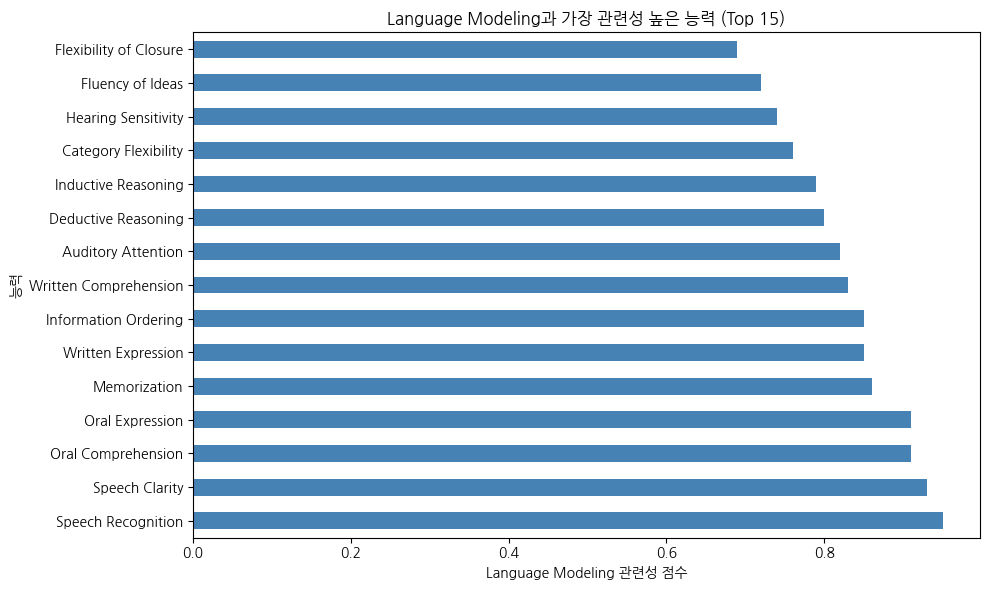

In [ ]:
# Language Modeling 컬럼만 확인
print("=== Language Modeling 관련성 점수 ===")
lm_scores = L["Language Modeling"].sort_values(ascending=False)
print("\nTop 10 능력:")
print(lm_scores.head(10))

# 시각화
plt.figure(figsize=(10, 6))
lm_scores.head(15).plot(kind='barh', color='steelblue')
plt.xlabel('Language Modeling 관련성 점수')
plt.ylabel('능력')
plt.title('Language Modeling과 가장 관련성 높은 능력 (Top 15)')
plt.tight_layout()
plt.show()

## 6. AIOE 계산 - Step 3: I 벡터 (AI 성능)

### ⚡ I 벡터란? (I<sub>jk</sub> in the formula)

I 벡터는 **AI 기술 k가 각 능력 j를 얼마나 잘 수행할 수 있는지**를 나타내는 성능 지표입니다.

**벡터 구조:**
```
능력(j)                       AI 성능(I_jk)
Written Comprehension         1.04
Oral Expression               0.66
Reading Comprehension         1.28
Mathematical Reasoning        0.03
Gross Body Equilibrium        -1.58
...
```

**수식 표현:**
$$I = I_{jk}$$

여기서:
- **j**: 능력 인덱스
- **k**: AI 기술 인덱스 (이 노트북에서는 Language Modeling만 사용)
- **I<sub>jk</sub>**: AI 기술 k가 능력 j를 수행하는 성능 (표준화된 점수)

### 📊 점수 해석

**논문 데이터의 특징:**
- 점수가 **표준화(Standardization)** 되어 있음
- 평균 = 0, 표준편차 = 1
- 범위: 약 -2 ~ +2 (대부분 -3 ~ +3 사이)

**해석:**
- **I<sub>jk</sub> > 0**: AI가 해당 능력을 평균보다 **잘** 수행
- **I<sub>jk</sub> = 0**: AI가 해당 능력을 평균 수준으로 수행
- **I<sub>jk</sub> < 0**: AI가 해당 능력을 평균보다 **못** 수행

**상대적 비교:**
- **I > +1**: 상위 16% (매우 잘함)
- **0 < I < +1**: 평균~상위 (잘함)
- **-1 < I < 0**: 평균~하위 (못함)
- **I < -1**: 하위 16% (매우 못함)

### 🔍 실제 예시

**실제 데이터 (Appendix E):**
- **Category Flexibility(범주화 유연성)**: **+1.28** → GPT는 개념 분류를 매우 잘함
- **Deductive Reasoning(연역 추론)**: **+1.04** → 논리적 추론 능력이 우수함
- **Oral Expression(구두 표현)**: **+0.66** → 말하기도 평균 이상
- **Mathematical Reasoning(수리 추론)**: **+0.03** → 수학은 평균 수준
- **Dynamic Strength(동적 근력)**: **-1.58** → 신체 능력은 매우 부족
- **Explosive Strength(순발력)**: **-1.60** → 물리적 힘은 전혀 없음

### 💡 왜 표준화된 점수인가?

**장점:**
1. **상대적 비교 가능**: "독해는 수학보다 얼마나 더 잘하는가?"
2. **벤치마크 간 비교**: 서로 다른 테스트 결과를 통합 가능
3. **통계적 분석 용이**: 평균 0 기준으로 해석 간단

**데이터 출처:** 논문 Appendix E (AI 벤치마크 테스트 결과를 표준화하여 측정)

In [ ]:
# AI 성능 점수 추출
I = ai_performance_df.set_index("O*NET Abilities")["Ability-Level AI Exposure"]

print(f"✅ I 벡터 길이: {len(I)}")
print(f"점수 범위: {I.min():.2f} ~ {I.max():.2f}")
print(f"평균: {I.mean():.2f}")

print("\n=== I 벡터 샘플 ===")
print(I.head(10))

✅ I 벡터 길이: 52
점수 범위: -1.72 ~ 1.91
평균: 0.00

=== I 벡터 샘플 ===
O*NET Abilities
Arm-Hand Steadiness    -1.125
Auditory Attention      0.660
Category Flexibility    1.276
Control Precision       0.032
Deductive Reasoning     1.040
Depth Perception        0.067
Dynamic Flexibility    -1.452
Dynamic Strength       -1.582
Explosive Strength     -1.599
Extent Flexibility     -1.558
Name: Ability-Level AI Exposure, dtype: float64


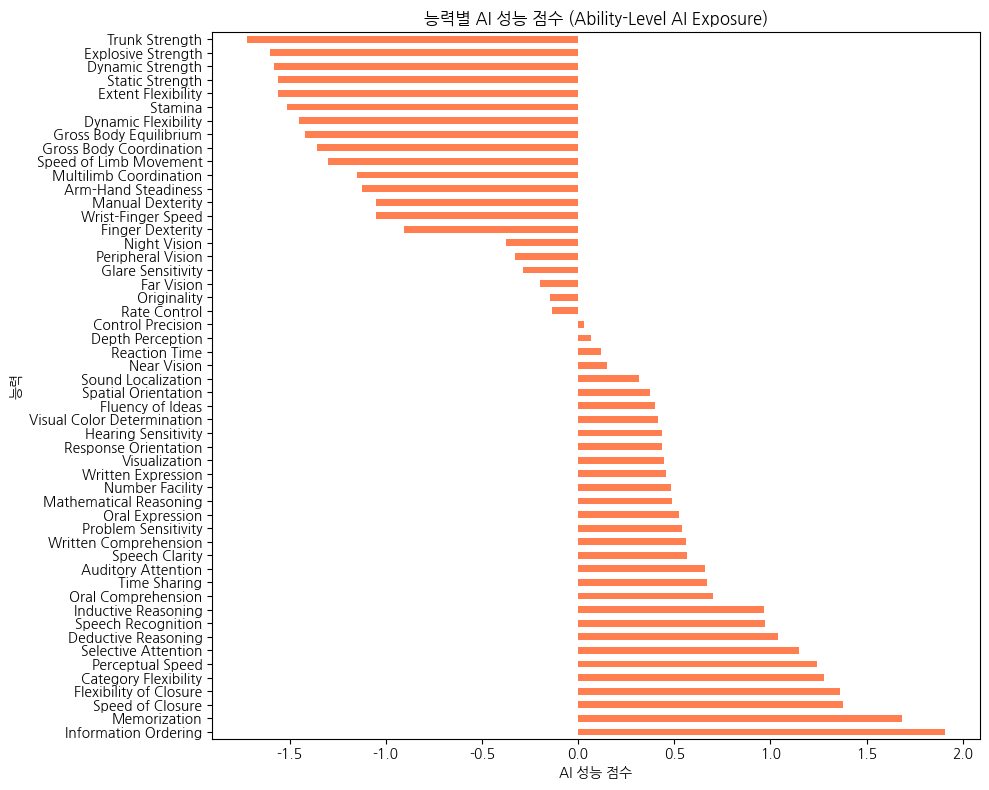

In [ ]:
# 시각화
plt.figure(figsize=(10, 8))
I.sort_values(ascending=False).plot(kind='barh', color='coral')
plt.xlabel('AI 성능 점수')
plt.ylabel('능력')
plt.title('능력별 AI 성능 점수 (Ability-Level AI Exposure)')
plt.tight_layout()
plt.show()

## 7. 능력 이름 통일 (컬럼명 정제)

### 🔧 왜 능력 이름을 통일해야 하는가?

R, L, I 세 개의 데이터를 결합하려면 **능력 이름이 정확히 일치**해야 합니다.

**문제점:**
- 데이터 출처가 다르면 능력 이름이 미묘하게 다를 수 있음
  - 예: "Oral Comprehension" vs "oral comprehension" vs "Oral Comprehension " (공백 포함)
- 대소문자, 공백 차이로 인해 같은 능력임에도 매칭 실패 가능

**해결 방법:**
1. **소문자 변환**: 대소문자 차이 제거
2. **공백 제거**: 앞뒤 불필요한 공백 제거

이렇게 하면 "Oral Comprehension"과 "oral comprehension"이 "oral comprehension"으로 통일되어 정확하게 매칭됩니다.

**중요성:**
- 매칭 실패 시 해당 능력은 AIOE 계산에서 제외됨
- 이름 통일을 통해 **데이터 손실을 최소화**하고 정확한 계산을 보장

In [ ]:
print("=== 이름 통일 전 ===")
print(f"R 컬럼 샘플: {R.columns[:3].tolist()}")
print(f"L 인덱스 샘플: {L.index[:3].tolist()}")
print(f"I 인덱스 샘플: {I.index[:3].tolist()}")

# 소문자 변환 및 공백 제거
R.columns = R.columns.str.strip().str.lower()
L.index = L.index.str.strip().str.lower()
I.index = I.index.str.strip().str.lower()

print("\n=== 이름 통일 후 ===")
print(f"R 컬럼 샘플: {R.columns[:3].tolist()}")
print(f"L 인덱스 샘플: {L.index[:3].tolist()}")
print(f"I 인덱스 샘플: {I.index[:3].tolist()}")

=== 이름 통일 전 ===
R 컬럼 샘플: ['Arm-Hand Steadiness', 'Auditory Attention', 'Category Flexibility']
L 인덱스 샘플: ['Arm-Hand Steadiness', 'Auditory Attention', 'Category Flexibility']
I 인덱스 샘플: ['Arm-Hand Steadiness', 'Auditory Attention', 'Category Flexibility']

=== 이름 통일 후 ===
R 컬럼 샘플: ['arm-hand steadiness', 'auditory attention', 'category flexibility']
L 인덱스 샘플: ['arm-hand steadiness', 'auditory attention', 'category flexibility']
I 인덱스 샘플: ['arm-hand steadiness', 'auditory attention', 'category flexibility']


In [ ]:
# 매칭 확인
r_abilities = set(R.columns)
l_abilities = set(L.index)
i_abilities = set(I.index)

matched_abilities = r_abilities & l_abilities & i_abilities

print("=== 능력 매칭 확인 ===")
print(f"R의 능력 수: {len(r_abilities)}")
print(f"L의 능력 수: {len(l_abilities)}")
print(f"I의 능력 수: {len(i_abilities)}")
print(f"\n✅ 모두 매칭된 능력 수: {len(matched_abilities)}")

# 매칭 안된 능력 확인
r_only = r_abilities - matched_abilities
l_only = l_abilities - matched_abilities
i_only = i_abilities - matched_abilities

if r_only:
    print(f"\n⚠️ R에만 있는 능력 ({len(r_only)}개): {list(r_only)[:5]}...")
if l_only:
    print(f"⚠️ L에만 있는 능력 ({len(l_only)}개): {list(l_only)[:5]}...")
if i_only:
    print(f"⚠️ I에만 있는 능력 ({len(i_only)}개): {list(i_only)[:5]}...")

=== 능력 매칭 확인 ===
R의 능력 수: 52
L의 능력 수: 52
I의 능력 수: 52

✅ 모두 매칭된 능력 수: 51

⚠️ R에만 있는 능력 (1개): ['visual color discrimination']...
⚠️ L에만 있는 능력 (1개): ['visual color determination']...
⚠️ I에만 있는 능력 (1개): ['visual color determination']...


## 8. AIOE 계산 - 최종 행렬 곱

### 🎯 AIOE 계산의 전체 과정

이제 R, L, I를 결합하여 최종 AIOE 점수를 계산합니다.

---

### 📊 Step-by-step 계산

**공식 (다시 한번):**

$$
\text{AIOE}_k = \frac{\sum_{j=1}^{52} A_{ij} \times L_{jk} \times I_{jk}}{\sum_{j=1}^{52} L_{jk} \times I_{jk}}
$$

**이 공식을 3단계로 나누면:**

#### **Step 1: L × I 계산 (능력별 AI 가중치)**

$$
W_j = L_{jk} \times I_{jk}
$$

- 각 능력 j가 AI에 의해 얼마나 "영향받을 수 있는지"를 계산
- AI와 관련성이 높고(L 큼) + AI 성능이 좋으면(I 큼) → W가 커짐

**예시:**
- **Written Comprehension**: L=0.90, I=0.85 → W = 0.765 (높은 가중치)
- **Gross Body Equilibrium**: L=0.00, I=0.00 → W = 0.000 (가중치 없음)

---

#### **Step 2: R × (L×I) 계산 (분자)**

$$
\text{분자} = \sum_{j=1}^{52} A_{ij} \times W_j = \sum_{j=1}^{52} A_{ij} \times L_{jk} \times I_{jk}
$$

- 직업 i가 요구하는 능력들에 AI 가중치를 곱해서 합산
- "이 직업이 AI로 대체 가능한 능력을 얼마나 많이 필요로 하는가?"

**예시 (교수 직업):**
- Written Comprehension 중요도: 4.5, W=0.765 → 기여도 = 3.44
- Oral Expression 중요도: 4.2, W=0.612 → 기여도 = 2.57
- Gross Body Equilibrium 중요도: 1.0, W=0.000 → 기여도 = 0.00
- **합계**: 약 6.01 (다른 능력들도 포함)

---

#### **Step 3: 정규화 (분모로 나누기)**

$$
\text{분모} = \sum_{j=1}^{52} L_{jk} \times I_{jk} = \sum_{j=1}^{52} W_j
$$

- 모든 능력의 AI 가중치 총합
- 분자를 분모로 나누면 **가중 평균** 형태가 됨

**최종 AIOE:**

$$
\text{AIOE}_k = \frac{\text{분자}}{\text{분모}} = \frac{6.01}{15.2} \approx 0.395
$$

→ 이 값은 0~5 범위로 스케일링되어 최종 점수가 됨

---

### 💡 결론적으로!

**AIOE는 다음 질문에 답합니다:**

> "이 직업이 필요로 하는 능력들 중, AI가 대체할 수 있는 능력의 비중은 얼마나 되는가?"

- **높은 AIOE (예: 4.5)**: 직업의 핵심 능력을 AI가 대부분 수행 가능 → 높은 영향
- **낮은 AIOE (예: 1.2)**: 직업의 핵심 능력을 AI가 거의 수행 불가 → 낮은 영향

---

### 🧮 코드에서의 구현

아래 코드에서:
- `LI = L.mul(I)` → Step 1: W<sub>j</sub> 계산
- `numerator = R.dot(LI)` → Step 2: 분자 계산
- `denominator = LI.sum()` → Step 3: 분모 계산
- `AIOE = numerator / denominator` → 최종 점수

In [ ]:
# Step 1: L × I (능력별 가중치)
LI = L.mul(I, axis=0)

print(f"✅ LI 행렬 크기: {LI.shape}")
print("\n=== LI 행렬 샘플 ===")
display(LI.head())

✅ LI 행렬 크기: (52, 10)

=== LI 행렬 샘플 ===


,Abstract Strategy Games,Real-Time Video Games,Image Recognition,Visual Question Answering,Generating Images,Reading Comprehension,Language Modeling,Translation,Speech Recognition,Instrumental Track Recognition
Human Ability,,,,,,,,,,
arm-hand steadiness,-0.54000,-0.76500,-0.49500,-0.55125,-0.38250,-0.22500,-0.21375,-0.21375,-0.25875,-0.24750
auditory attention,0.42240,0.52140,0.30360,0.35640,0.21780,0.27720,0.54120,0.48840,0.60060,0.62040
category flexibility,1.14840,1.09736,0.98252,1.03356,0.95700,1.04632,0.96976,0.88044,0.80388,0.86768
control precision,0.02304,0.02944,0.02144,0.02528,0.01856,0.01248,0.01088,0.00992,0.01312,0.01184
deductive reasoning,0.91520,0.89440,0.67600,0.76960,0.65520,0.90480,0.83200,0.78000,0.62400,0.50960


### 💡 LI 행렬 해석하기

LI 행렬(L × I)은 **각 능력이 AI에 의해 얼마나 영향받을 수 있는지**를 나타냅니다.

**계산 과정:**
- **L (연관성)**: 능력과 AI 기술의 관련성
- **I (성능)**: AI가 그 능력을 수행하는 성능
- **LI = L × I**: 두 값을 곱하면 "실제로 AI가 그 능력을 대체할 가능성"

**예시로 이해하기:**

| 능력 | L (관련성) | I (AI 성능) | LI (영향도) | 해석 |
|------|------------|-------------|-------------|------|
| Written Comprehension | 0.90 | 0.85 | 0.765 | 언어 모델과 강하게 연관 + 성능 우수 = **높은 영향** |
| Mathematical Reasoning | 0.70 | 0.65 | 0.455 | 연관성 있음 + 성능 보통 = **중간 영향** |
| Gross Body Equilibrium | 0.00 | 0.00 | 0.000 | 신체 능력은 언어 모델과 무관 = **영향 없음** |

**왜 곱셈인가?**
- 관련성만 높고 성능이 낮으면 → 실제 영향은 작음
- 성능만 높고 관련성이 낮으면 → 역시 실제 영향은 작음
- **둘 다 높아야** → 실제로 AI가 그 능력을 대체 가능

이렇게 계산된 LI 값이 다음 단계에서 **가중치**로 사용됩니다.

In [ ]:
# Step 2: R과 정렬
LI_aligned = LI.reindex(R.columns).fillna(0)

print(f"✅ 정렬 후 LI 크기: {LI_aligned.shape}")
print(f"- R의 컬럼 수와 일치: {LI_aligned.shape[0] == len(R.columns)}")

print("\n=== 정렬 후 LI 샘플 ===")
display(LI_aligned.head())

✅ 정렬 후 LI 크기: (52, 10)
- R의 컬럼 수와 일치: True

=== 정렬 후 LI 샘플 ===


,Abstract Strategy Games,Real-Time Video Games,Image Recognition,Visual Question Answering,Generating Images,Reading Comprehension,Language Modeling,Translation,Speech Recognition,Instrumental Track Recognition
Element Name,,,,,,,,,,
arm-hand steadiness,-0.54000,-0.76500,-0.49500,-0.55125,-0.38250,-0.22500,-0.21375,-0.21375,-0.25875,-0.24750
auditory attention,0.42240,0.52140,0.30360,0.35640,0.21780,0.27720,0.54120,0.48840,0.60060,0.62040
category flexibility,1.14840,1.09736,0.98252,1.03356,0.95700,1.04632,0.96976,0.88044,0.80388,0.86768
control precision,0.02304,0.02944,0.02144,0.02528,0.01856,0.01248,0.01088,0.00992,0.01312,0.01184
deductive reasoning,0.91520,0.89440,0.67600,0.76960,0.65520,0.90480,0.83200,0.78000,0.62400,0.50960


In [ ]:
# Step 3: AIOE 계산
# 분자: R × LI
numerator = R.dot(LI_aligned)

# 분모: 각 AI 분야별 능력 가중치 합계
denominator = LI_aligned.sum(axis=0)

# AIOE = 분자 / 분모
aioe_df = numerator.divide(denominator, axis=1)

print(f"✅ AIOE 결과 크기: {aioe_df.shape}")
print(f"- 직업 수: {aioe_df.shape[0]:,}")
print(f"- AI 응용 분야 수: {aioe_df.shape[1]}")

print("\n=== AIOE 결과 샘플 ===")
display(aioe_df.head())

✅ AIOE 결과 크기: (894, 10)
- 직업 수: 894
- AI 응용 분야 수: 10

=== AIOE 결과 샘플 ===


,Abstract Strategy Games,Real-Time Video Games,Image Recognition,Visual Question Answering,Generating Images,Reading Comprehension,Language Modeling,Translation,Speech Recognition,Instrumental Track Recognition
O*NET-SOC Code,,,,,,,,,,
11-1011.00,5.385009,7.011122,6.524957,6.505507,5.603529,4.354611,4.251751,4.344611,4.328766,4.433840
11-1011.03,4.801073,6.235302,5.771978,5.778256,4.965222,3.916510,3.836301,3.913708,3.896756,3.969122
11-1021.00,4.404578,5.570992,5.192556,5.197615,4.552195,3.695464,3.627715,3.687858,3.664121,3.703528
11-2011.00,4.801381,6.209788,5.805360,5.790915,4.997630,3.925523,3.827689,3.906838,3.887957,3.966012
11-2021.00,4.812858,6.225574,5.808075,5.788377,4.997803,3.920011,3.812078,3.893248,3.872389,3.954400


## 9. Language Modeling AIOE 추출

### 🎯 왜 Language Modeling만 추출하는가?

앞 단계에서 우리는 여러 AI 기술(Language Modeling, Image Recognition, Object Detection 등)에 대한 AIOE를 모두 계산했습니다.

**이 노트북의 목적:**
- **ChatGPT와 같은 언어 모델**이 직업에 미치는 영향 분석
- 따라서 **Language Modeling** 컬럼만 추출하여 사용

**다른 AI 기술도 분석 가능:**
- `aioe_df["Image Recognition"]`: 이미지 인식 AI(예: 컴퓨터 비전)의 영향
- `aioe_df["Object Detection"]`: 객체 탐지 AI의 영향
- 같은 방법론으로 다양한 AI 기술의 직업별 영향을 분석 가능

이제 Language Modeling AIOE 점수를 가진 직업 데이터를 기반으로 추가 분석을 진행합니다.

## 9. Language Modeling AIOE 추출

Language Modeling 컬럼만 추출하여 직업별 노출도를 확인합니다.

In [ ]:
# Language Modeling 컬럼만 추출
job_aioe_scores = aioe_df["Language Modeling"].reset_index()
job_aioe_scores.columns = ["soc_code", "AIOE"]

print(f"✅ 직업별 AIOE 점수: {len(job_aioe_scores):,} rows")
print("\n=== 상위 10개 직업 ===")
display(job_aioe_scores.nlargest(10, "AIOE"))

In [ ]:
# AIOE 분포 통계
print("=== AIOE 분포 ===")
print(job_aioe_scores["AIOE"].describe())

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 히스토그램
axes[0].hist(job_aioe_scores["AIOE"], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel("AIOE Score")
axes[0].set_ylabel("Frequency")
axes[0].set_title("AIOE 점수 분포")
axes[0].grid(alpha=0.3)

# 박스플롯
axes[1].boxplot(job_aioe_scores["AIOE"], vert=True)
axes[1].set_ylabel("AIOE Score")
axes[1].set_title("AIOE 박스플롯")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 10. 직업 정보 병합

In [ ]:
# 직업 정보 데이터 확인
occ_sel = occupations_df[["O*NET-SOC Code", "Title", "Description"]]

print(f"직업 정보 데이터: {len(occ_sel):,} rows")
print("\n=== 샘플 ===")
display(occ_sel.head())

In [ ]:
# AIOE와 병합
job_aioe_with_info = job_aioe_scores.merge(
    occ_sel,
    left_on="soc_code",
    right_on="O*NET-SOC Code",
    how="left"
).drop(columns=["O*NET-SOC Code"])

print(f"✅ 병합 후: {len(job_aioe_with_info):,} rows")

# 병합 결과 확인
no_title = job_aioe_with_info["Title"].isnull().sum()
print(f"\n⚠️ Title 없는 직업: {no_title}개")

print("\n=== 병합 결과 샘플 ===")
display(job_aioe_with_info.head())

## 11. SOC 코드 정리 및 그룹화

### 🏷️ SOC 코드란?

**SOC (Standard Occupational Classification)**은 미국 정부에서 사용하는 직업 분류 체계입니다.

**SOC 코드 구조:**
```
예: 15-1252.00
    ├─ 15: Major Group (컴퓨터 및 수학 관련 직업)
    ├─ 15-12: Minor Group (컴퓨터 관련 직업)
    ├─ 15-1252: Detailed Occupation (소프트웨어 개발자)
    └─ 15-1252.00: O*NET-SOC 세부 직업
```

**코드 길이:**
- **7자리** (예: 15-1252): 일반적인 직업 분류 (BLS, OEWS 등에서 사용)
- **8~10자리** (예: 15-1252.00): O*NET에서 더 세분화한 직업

**왜 7자리로 통일하는가?**
- O*NET은 세부적으로 직업을 나누지만, OEWS 임금 데이터는 7자리 코드 사용
- 두 데이터를 병합하려면 **코드 체계를 통일**해야 함
- 예: "15-1252.01 (게임 개발자)"와 "15-1252.02 (앱 개발자)"를 "15-1252 (소프트웨어 개발자)"로 합침

**그룹화의 영향:**
- 같은 7자리 코드를 가진 직업들의 AIOE는 **평균**으로 계산
- 직업 이름과 설명은 **세미콜론(;)** 으로 연결하여 보존

## 11. SOC 코드 정리 및 그룹화

SOC 코드를 7자리로 통일하고, 중복된 직업을 그룹화합니다.

In [ ]:
# SOC 코드를 7자리로 변환
job_aioe_with_info["soc_code_clean"] = job_aioe_with_info["soc_code"].str[:7]

print("=== SOC 코드 변환 ===")
print(f"원본 직업 수: {job_aioe_with_info['soc_code'].nunique():,}")
print(f"7자리 코드 직업 수: {job_aioe_with_info['soc_code_clean'].nunique():,}")

# 샘플 확인
print("\n=== 변환 예시 ===")
display(job_aioe_with_info[["soc_code", "soc_code_clean", "Title"]].head())

In [ ]:
# 병합된 직업 확인 (같은 7자리 코드를 가진 직업들)
merged_jobs = job_aioe_with_info.groupby("soc_code_clean").filter(lambda x: len(x) > 1)

if len(merged_jobs) > 0:
    print(f"⚠️ 병합될 직업: {len(merged_jobs):,}개")
    print("\n=== 병합 예시 (상위 10개) ===")
    display(merged_jobs[["soc_code", "soc_code_clean", "Title", "AIOE"]].head(10))
else:
    print("✅ 병합될 직업 없음")

In [ ]:
# SOC 코드별로 그룹화
job_grouped = job_aioe_with_info.groupby("soc_code_clean", as_index=False).agg({
    "AIOE": "mean",  # AIOE는 평균
    "Title": lambda x: "; ".join(x),  # Title은 세미콜론으로 연결
    "Description": lambda x: "; ".join(x.dropna().unique())  # Description은 중복 제거 후 연결
})

print(f"✅ 그룹화 완료: {len(job_grouped):,} 직업")
print(f"- 원본: {len(job_aioe_with_info):,} → 그룹화 후: {len(job_grouped):,}")

# 그룹화 결과 샘플 확인
print("\n=== 그룹화 결과 샘플 ===")
display(job_grouped.head())

### 그룹화 수행

같은 7자리 SOC 코드를 가진 직업들을 그룹화합니다:
- **AIOE**: 평균값 계산
- **Title**: 세미콜론(;)으로 연결
- **Description**: 중복 제거 후 세미콜론으로 연결

## 12. OEWS 데이터 처리 (임금 및 고용)

### 💰 OEWS 데이터란?

**OEWS (Occupational Employment and Wage Statistics)**는 미국 노동통계국(BLS)에서 제공하는 직업별 고용 및 임금 통계입니다.

**주요 정보:**
- **TOT_EMP (Total Employment)**: 해당 직업의 총 고용 인원 수
- **A_MEAN (Annual Mean Wage)**: 해당 직업의 연평균 임금 (달러)
- 미국 전역의 주(State), 대도시권(Metropolitan Area) 단위로 제공

**데이터 구조:**
```
한 직업(예: Software Developer)이 여러 지역에 걸쳐 다수의 행으로 존재
- California, San Francisco: 50,000명, $150,000
- New York, New York City: 40,000명, $140,000
- Texas, Austin: 20,000명, $120,000
→ 전국 단위로 집계 필요
```

**집계 방법:**
1. **Employment**: 모든 지역의 고용 인원을 **합산**
2. **Mean_Wage**: 고용 인원으로 **가중평균** 계산
   - (지역별 평균임금 × 고용인원)의 합 ÷ 총 고용인원
   - 큰 지역의 임금이 더 큰 영향을 미치도록

**왜 OEWS 데이터를 추가하는가?**
- AIOE 점수와 **임금**의 관계 분석 → "AI 영향을 많이 받는 직업이 고임금인가?"
- AIOE 점수와 **고용 규모**의 관계 분석 → "얼마나 많은 사람들이 영향받는가?"

## 12. OEWS 데이터 처리 (임금 및 고용)

BLS OEWS 데이터에서 직업별 고용 규모와 평균 임금을 추출합니다.

In [ ]:
# OEWS 데이터 확인
print("=== OEWS 데이터 구조 ===")
print(f"전체 행 수: {len(oews_df):,}")
print(f"\n컬럼 목록:")
print(oews_df.columns.tolist())

print("\n=== 샘플 데이터 ===")
display(oews_df[["OCC_CODE", "OCC_TITLE", "TOT_EMP", "A_MEAN"]].head())

In [ ]:
# 직업 코드별 집계 (전국 단위)
oews_grouped = oews_df.groupby("OCC_CODE", group_keys=False).apply(
    lambda g: pd.Series({
        "Employment": pd.to_numeric(g["TOT_EMP"], errors="coerce").sum(),
        "Mean_Wage": (
            (pd.to_numeric(g["A_MEAN"], errors="coerce") * 
             pd.to_numeric(g["TOT_EMP"], errors="coerce")).sum()
            / pd.to_numeric(g["TOT_EMP"], errors="coerce").sum()
            if pd.to_numeric(g["TOT_EMP"], errors="coerce").sum() > 0 else np.nan
        )
    }),
    include_groups=False
).reset_index()

print(f"✅ OEWS 집계 후 직업 수: {len(oews_grouped):,}")

print("\n=== OEWS 집계 결과 샘플 ===")
display(oews_grouped.head())

In [ ]:
# 컬럼명 정리 및 SOC 코드 형식 통일
oews_grouped.rename(columns={"OCC_CODE": "soc_code_clean"}, inplace=True)
oews_grouped["soc_code_clean"] = oews_grouped["soc_code_clean"].astype(str)

print("✅ 컬럼명 변경 완료")
print("\n=== 변경 후 샘플 ===")
display(oews_grouped.head())

In [ ]:
# 임금 및 고용 분포 확인
print("=== OEWS 데이터 통계 ===")
print("\n[Employment]")
print(oews_grouped["Employment"].describe())

print("\n[Mean_Wage]")
wage_data = oews_grouped[oews_grouped["Mean_Wage"].notna()]
print(wage_data["Mean_Wage"].describe())

In [ ]:
# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 고용 분포
employment_clean = oews_grouped[oews_grouped["Employment"] > 0]
axes[0].hist(np.log10(employment_clean["Employment"]), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel("Log10(Employment)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("직업별 고용 규모 분포 (로그 스케일)")
axes[0].grid(alpha=0.3)

# 임금 분포
wage_clean = oews_grouped[(oews_grouped["Mean_Wage"].notna()) & (oews_grouped["Mean_Wage"] > 0)]
axes[1].hist(wage_clean["Mean_Wage"], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel("Mean Wage ($)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("직업별 평균 임금 분포")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 13. 최종 데이터 병합

In [ ]:
# AIOE + 직업 정보 + OEWS 병합
job_aioe_analysis = job_grouped.merge(
    oews_grouped,
    on="soc_code_clean",
    how="left"
)

print(f"✅ 최종 병합 완료: {len(job_aioe_analysis):,} rows")
print("\n=== 최종 데이터 샘플 ===")
display(job_aioe_analysis.head())

## 14. 데이터 품질 검증 및 결측치 처리

### 🔍 결측치 처리 전략

결측치(Missing Data)는 데이터 분석에서 신중하게 다루어야 하는 중요한 문제입니다.

**결측치가 발생하는 이유:**
1. **O*NET과 OEWS 코드 불일치**: O*NET의 세부 직업이 OEWS에 없는 경우
2. **신규 직업**: 최근 생긴 직업은 OEWS에 아직 통계가 없을 수 있음
3. **통폐합된 직업**: 직업 분류가 변경되어 매칭 실패

**우리의 처리 방식:**

| 데이터 | 결측치 처리 | 이유 |
|--------|-------------|------|
| **Title / Description** | "Unknown"으로 채움 | 분석에 필수적이지 않고, 표시용이므로 기본값 사용 |
| **Employment / Mean_Wage** | **NaN 유지** | ⚠️ 0으로 채우면 안 됨! |

**왜 Employment/Wage를 0으로 채우면 안 되는가?**

❌ **잘못된 방법:**
```python
# 나쁜 예: 0으로 채우기
df["Mean_Wage"].fillna(0)  # 위험!
```

이렇게 하면:
- "데이터 없음"과 "실제로 임금이 0원"을 구분할 수 없음
- 평균 계산 시 0이 포함되어 결과가 왜곡됨
- 시각화에서 0원 직업이 나타나 혼란 초래

✅ **올바른 방법:**
```python
# 좋은 예: NaN 유지 + 플래그 추가
df["has_wage_data"] = ~df["Mean_Wage"].isnull()
```

이렇게 하면:
- "데이터 있음/없음"을 명확히 구분
- 분석 시 `df[df["has_wage_data"]]`로 필터링 가능
- 데이터 무결성 유지

## 14. 데이터 품질 검증 및 결측치 처리

In [ ]:
# Title/Description 결측치 처리
job_aioe_analysis["Title"] = job_aioe_analysis["Title"].fillna("Unknown")
job_aioe_analysis["Description"] = job_aioe_analysis["Description"].fillna("Unknown")

# Employment/Wage 데이터 플래그 추가 (결측치는 NaN으로 유지)
job_aioe_analysis["has_employment_data"] = ~job_aioe_analysis["Employment"].isnull()
job_aioe_analysis["has_wage_data"] = ~job_aioe_analysis["Mean_Wage"].isnull()

print("✅ 결측치 처리 완료")
print(f"\n- Employment 데이터 있음: {job_aioe_analysis['has_employment_data'].sum():,}개")
print(f"- Wage 데이터 있음: {job_aioe_analysis['has_wage_data'].sum():,}개")

In [ ]:
# 최종 데이터 요약 통계
print("=== AIOE 점수 분포 ===")
print(job_aioe_analysis["AIOE"].describe())

print("\n=== 임금 데이터 (결측 제외) ===")
wage_available = job_aioe_analysis[job_aioe_analysis["has_wage_data"]]
print(f"임금 데이터 있는 직업: {len(wage_available):,}개")
print(wage_available["Mean_Wage"].describe())

In [ ]:
# OEWS와 매칭 안된 직업 분석
unmatched = job_aioe_analysis[~job_aioe_analysis["has_wage_data"]]

print("=== OEWS 매칭 분석 ===")
print(f"총 직업 수: {len(job_aioe_analysis):,}")
print(f"매칭된 직업: {job_aioe_analysis['has_wage_data'].sum():,}")
print(f"매칭 안된 직업: {len(unmatched):,}")
print(f"매칭률: {job_aioe_analysis['has_wage_data'].sum() / len(job_aioe_analysis) * 100:.1f}%")

if len(unmatched) > 0:
    print("\n=== 매칭 안된 직업 중 AIOE 상위 10개 ===")
    display(unmatched.nlargest(10, "AIOE")[["soc_code_clean", "Title", "AIOE"]])

In [ ]:
# AIOE와 임금의 관계 시각화
wage_data = job_aioe_analysis[job_aioe_analysis["has_wage_data"]]

plt.figure(figsize=(10, 6))
plt.scatter(wage_data["AIOE"], wage_data["Mean_Wage"], alpha=0.5, s=30)
plt.xlabel("AIOE Score")
plt.ylabel("Mean Wage ($)")
plt.title("AIOE 점수와 평균 임금의 관계")
plt.grid(alpha=0.3)

# 추세선
z = np.polyfit(wage_data["AIOE"], wage_data["Mean_Wage"], 1)
p = np.poly1d(z)
plt.plot(wage_data["AIOE"].sort_values(), p(wage_data["AIOE"].sort_values()), 
         "r--", alpha=0.8, linewidth=2, label=f'추세선: y={z[0]:.2f}x+{z[1]:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# 상관계수
correlation = wage_data[["AIOE", "Mean_Wage"]].corr().iloc[0, 1]
print(f"\n상관계수: {correlation:.4f}")

## 15. 최종 결과 확인

In [ ]:
# AIOE 상위 20개 직업
print("=== AIOE 상위 20개 직업 ===")
top_20 = job_aioe_analysis.nlargest(20, "AIOE")
display(top_20[["soc_code_clean", "Title", "AIOE", "Mean_Wage", "Employment"]])

In [ ]:
# AIOE 하위 20개 직업
print("=== AIOE 하위 20개 직업 ===")
bottom_20 = job_aioe_analysis.nsmallest(20, "AIOE")
display(bottom_20[["soc_code_clean", "Title", "AIOE", "Mean_Wage", "Employment"]])

In [ ]:
# 논문 결과와 비교
print("=== 논문의 Top 5 직업 ===")
print("1. Telemarketers")
print("2. English Language and Literature Teachers, Postsecondary")
print("3. Foreign Language and Literature Teachers, Postsecondary")
print("4. History Teachers, Postsecondary")
print("5. Law Teachers, Postsecondary")

print("\n=== 우리 데이터의 Top 5 ===")
for i, (idx, row) in enumerate(top_20.head(5).iterrows(), 1):
    print(f"{i}. {row['Title']} (AIOE: {row['AIOE']:.3f})")

## 16. 데이터 저장

In [ ]:
# CSV 파일로 저장
output_path = "../datas/processed/job_aioe_processed.csv"
job_aioe_analysis.to_csv(output_path, index=False, encoding="utf-8")

print(f"✅ 저장 완료: {output_path}")
print(f"\n저장된 데이터:")
print(f"- 직업 수: {len(job_aioe_analysis):,}")
print(f"- 컬럼 수: {len(job_aioe_analysis.columns)}")
print(f"\n컬럼 목록:")
print(job_aioe_analysis.columns.tolist())